##Bike Sharing Assignment

#Step 1: Reading and Understanding Data

*Importing neccessary python libraries for data analysis*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for data spliting
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# for scaling of data
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor

# for model evaluation
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*We want to display all rows and columns whenever we execute a python query*

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

*Mounting bike sharing csv dataset into google colab notebook*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

fp="/content/drive/MyDrive/Colab Notebooks/IIIT Bangalore/3_MachineLearning/2_Case study/day.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Loading as dataframe using pandas and checking data in notebook*

In [4]:
bike_df = pd.read_csv(fp)
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
bike_df.shape

(730, 16)

*Droppping Unnecessary columns that in no way will effect target variable cnt*

In [7]:
bike_df=bike_df.drop(columns=['instant','dteday','casual','registered'])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


*Inspecting the datatset*

In [8]:
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
for i in bike_df.columns:
  print(str(i) + " : " + str(bike_df[i].value_counts().count()))
    

season : 4
yr : 2
mnth : 12
holiday : 2
weekday : 7
workingday : 2
weathersit : 3
temp : 498
atemp : 689
hum : 594
windspeed : 649
cnt : 695


In [10]:
bike_df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [11]:
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


**visualising the numerical variables**

In [12]:
sns.set(rc={'figure.figsize':(20,27)})

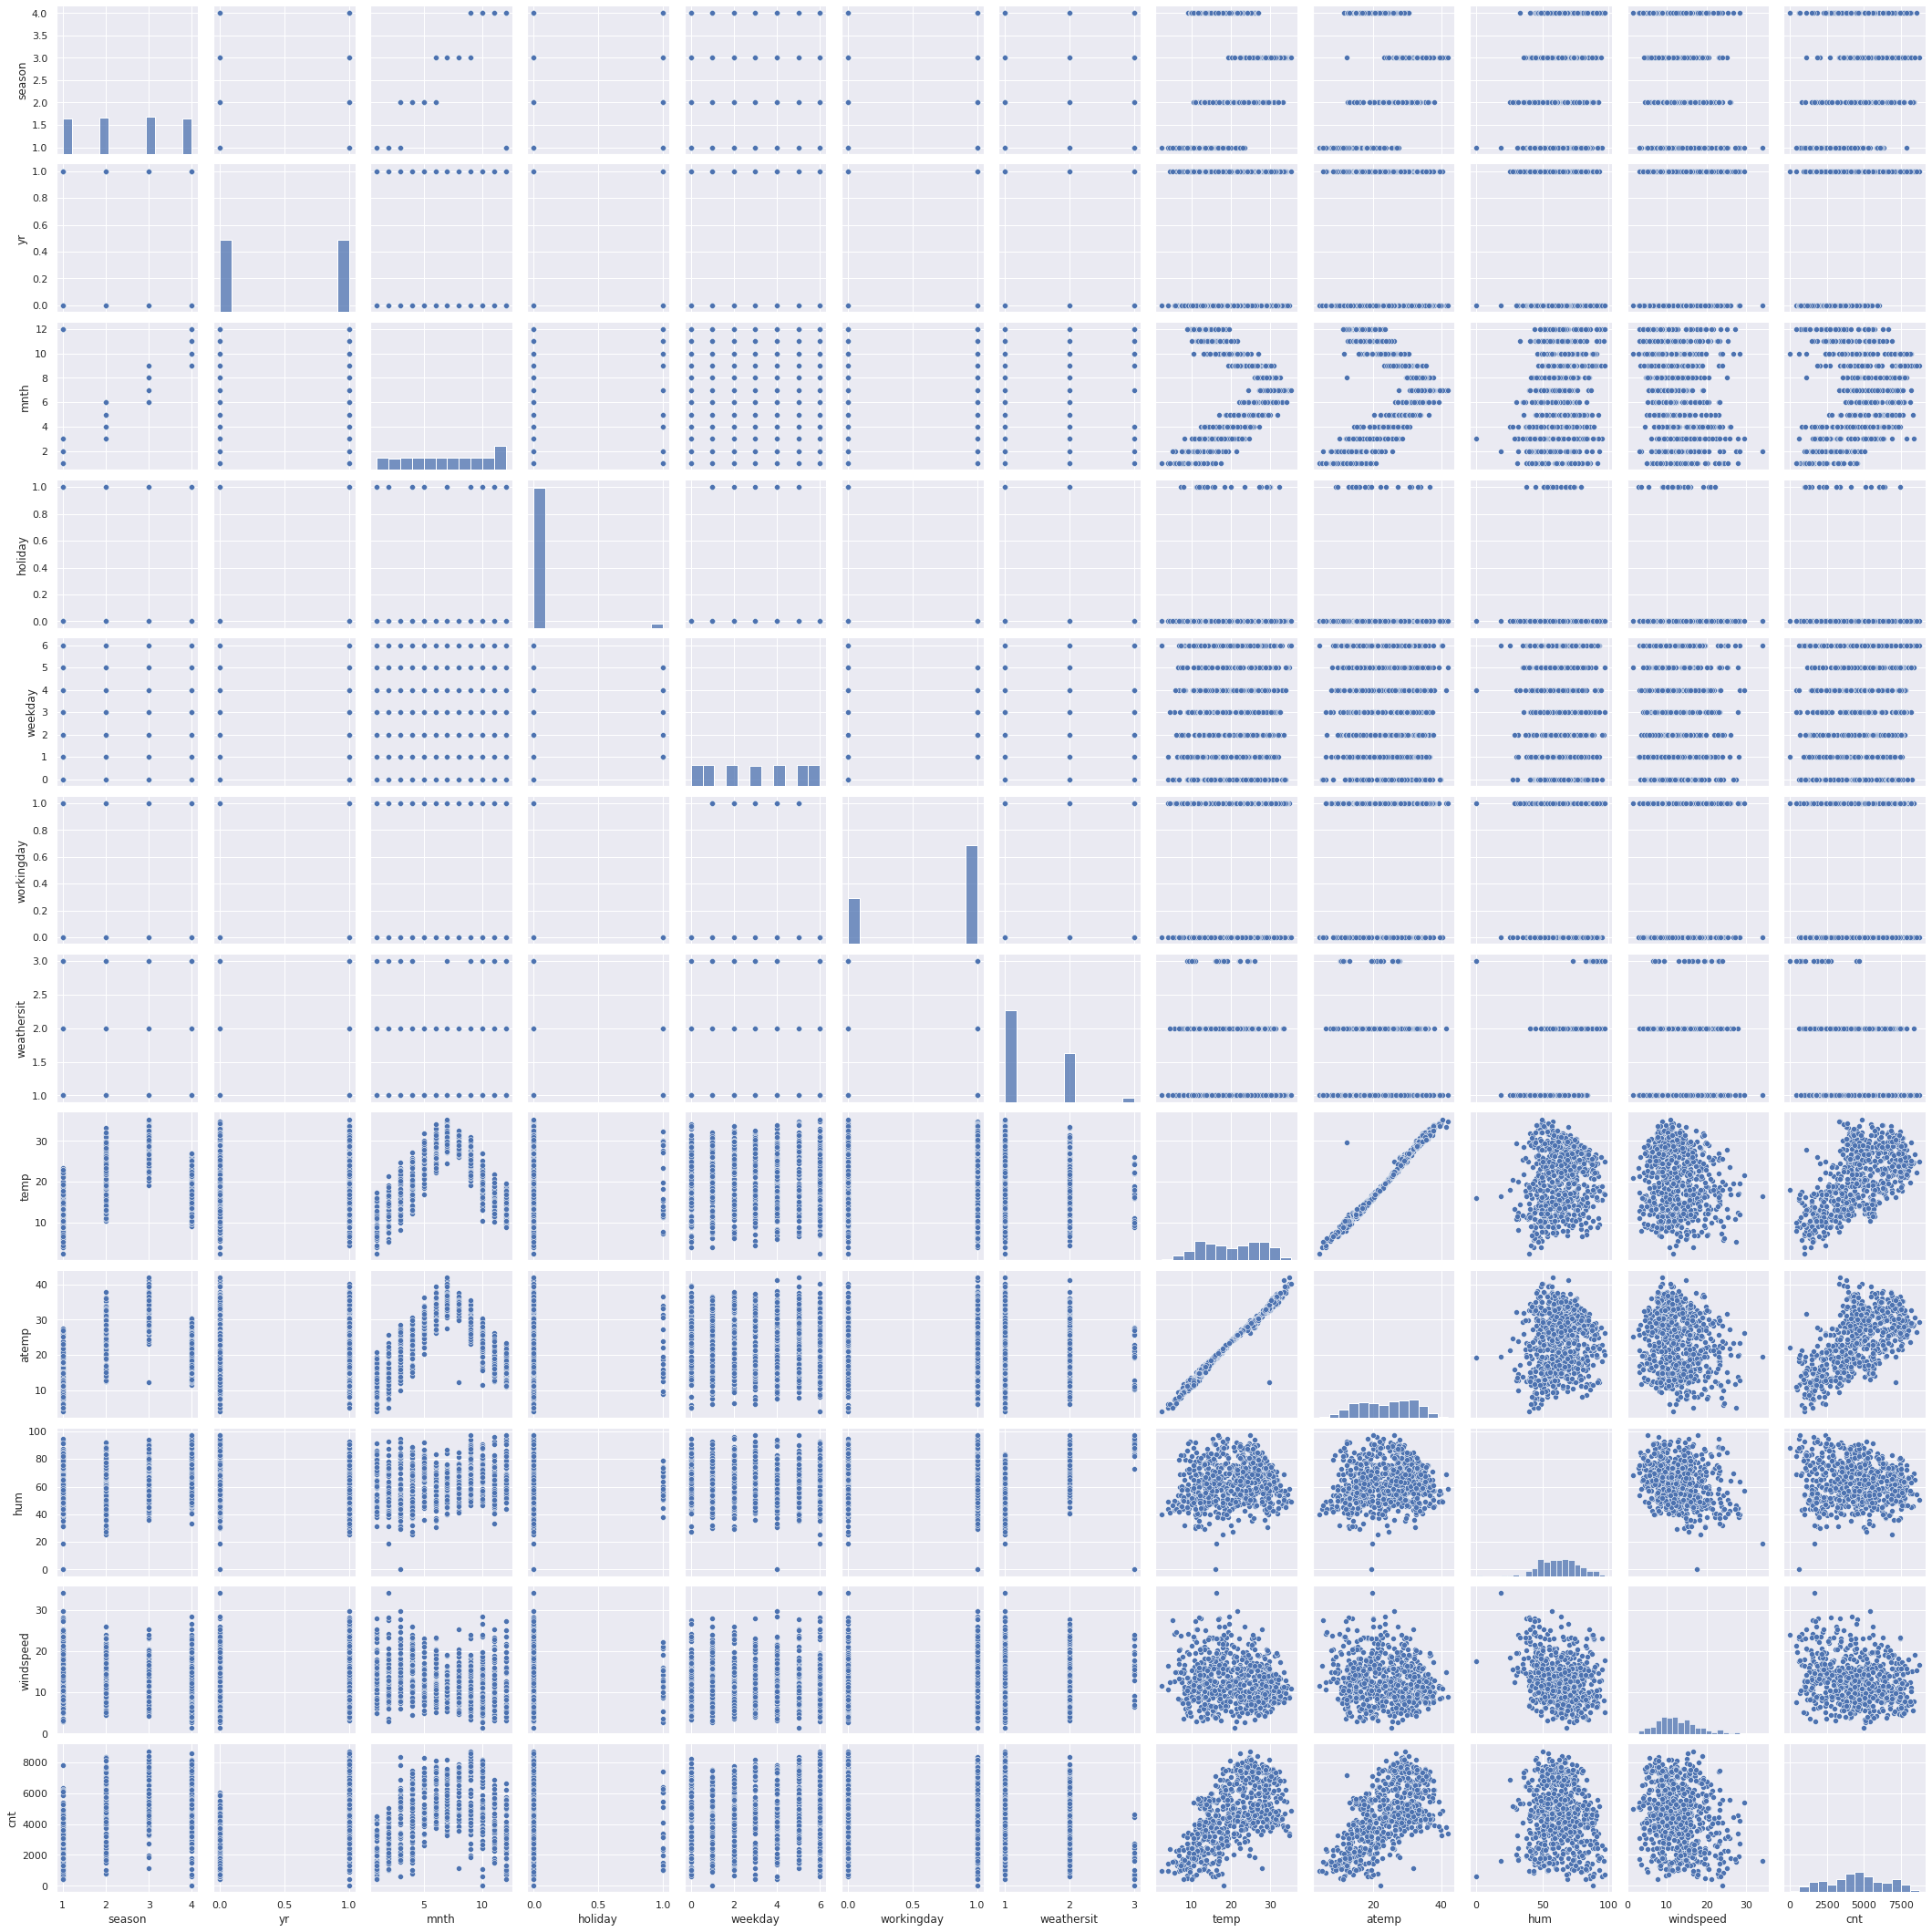

In [13]:
sns.pairplot(bike_df)

**Independent Variable temp shows linear relation with dependent variable cnt it means we can use linear regression**

*Compute the correlation matrix*


In [14]:
bcor = bike_df.corr()
bcor

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


*Generate Heatmap using correlation matrix above*

Text(0.5, 1.0, 'Correlation between numerical features')

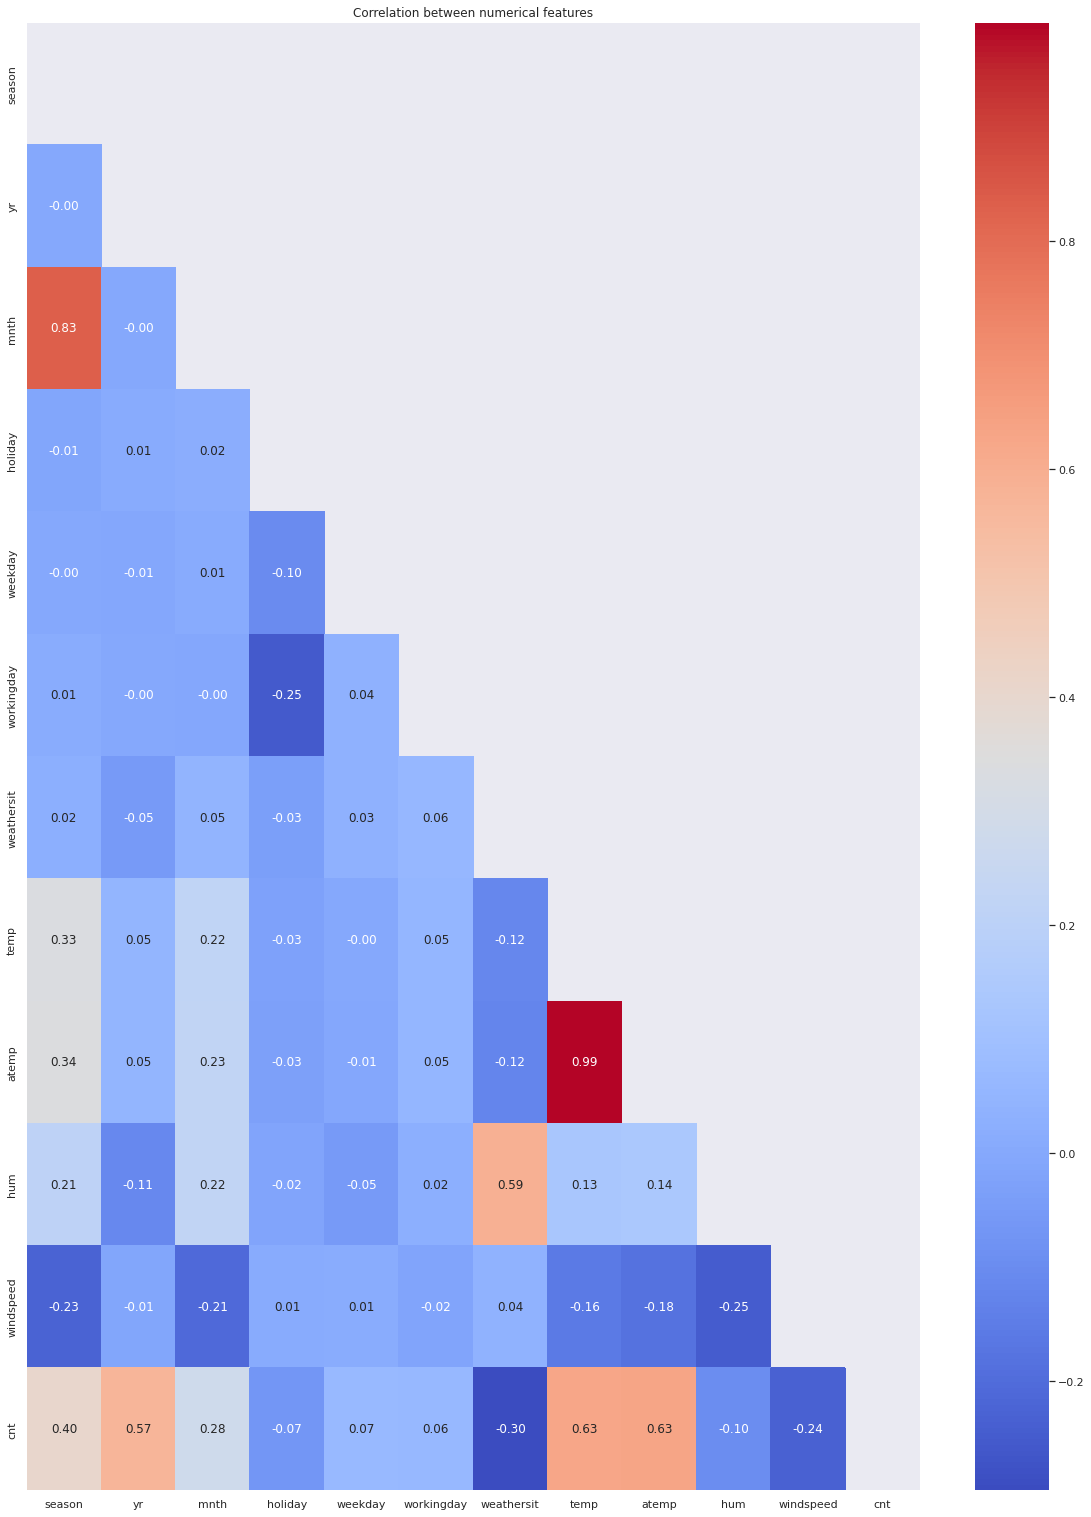

In [15]:
# Generate a mask for the upper triangle
mk = np.zeros_like(bcor, dtype=np.bool)
mk[np.triu_indices_from(mk)] = True

sns.heatmap(bcor, mask=mk, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

*visualizing categorical variables vs continuous variable*

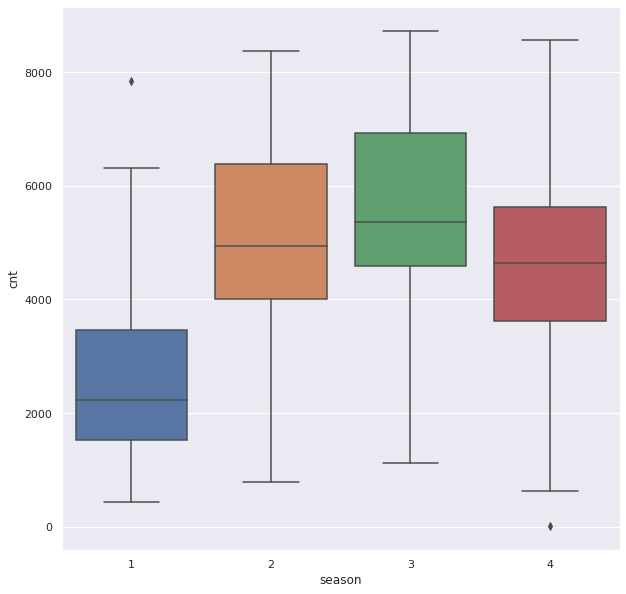

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='season',y='cnt',data=bike_df)

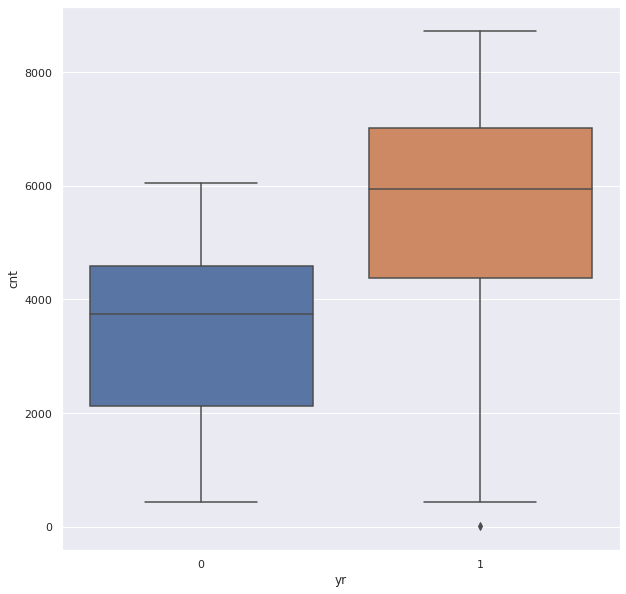

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(x='yr',y='cnt',data=bike_df)

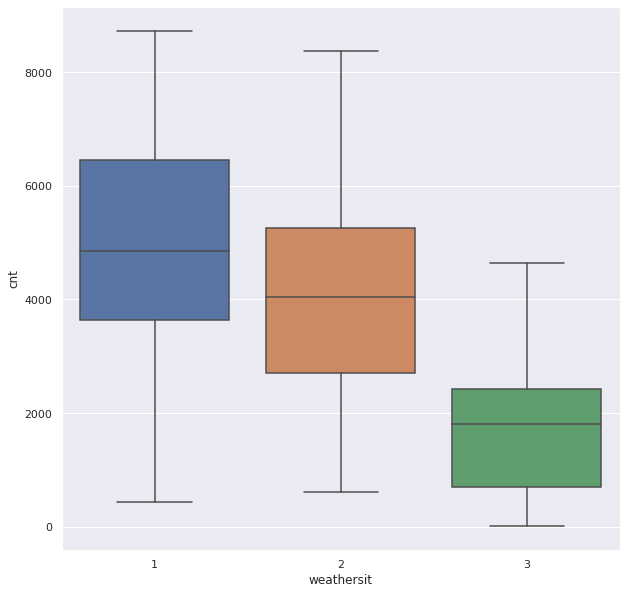

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x='weathersit',y='cnt',data=bike_df)

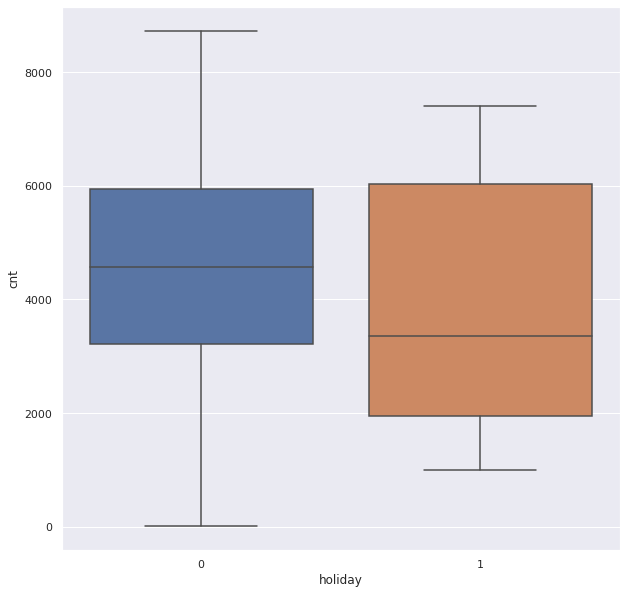

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x='holiday',y='cnt',data=bike_df)

#Step 2: Preparing Data for modelling



1. Converting categorical variables to dummy variables
2. Drop redundant first dummy variable for each categorical variable
3. Removing Outliers using Inter quantile range



In [20]:
bike_dum=pd.get_dummies(data=bike_df, columns=['season','mnth','weekday','weathersit'],drop_first=True)
bike_dum

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.181250,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.686950,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.470250,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.606100,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.463500,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,8.378268,11.660450,51.8261,6.000868,1606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,10.441950,49.8696,11.304642,1510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7,0,0,0,6.765000,8.112700,53.5833,17.875868,959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8,0,0,0,5.671653,5.808750,43.4167,24.250650,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,7.544400,48.2917,14.958889,1321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [21]:
bike_dum.shape

(730, 30)

In [22]:
bike_dum.dtypes

yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
cnt               int64
season_2          uint8
season_3          uint8
season_4          uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object

*Function to remove outliers*

In [23]:
def rem_outliers(col_out):
  Q1 = col_out.quantile(0.25)
  Q3 = col_out.quantile(0.75)
  Inter_Quartile_Range = Q3-Q1
  return bike_dum[~((col_out < (Q1 - 1.5*Inter_Quartile_Range)) | (col_out>(Q3 +1.5*Inter_Quartile_Range)))]

In [24]:
sns.set(rc={'figure.figsize':(10,10)})

*Detecting and removing outliers*

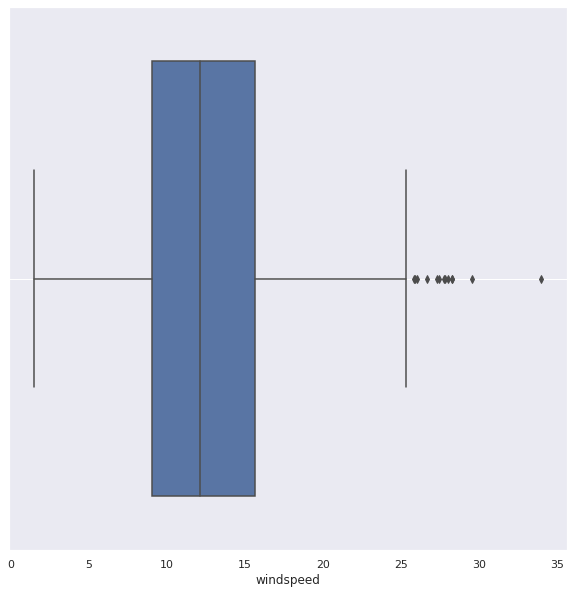

In [25]:
sns.boxplot(bike_dum['windspeed'])
plt.grid()

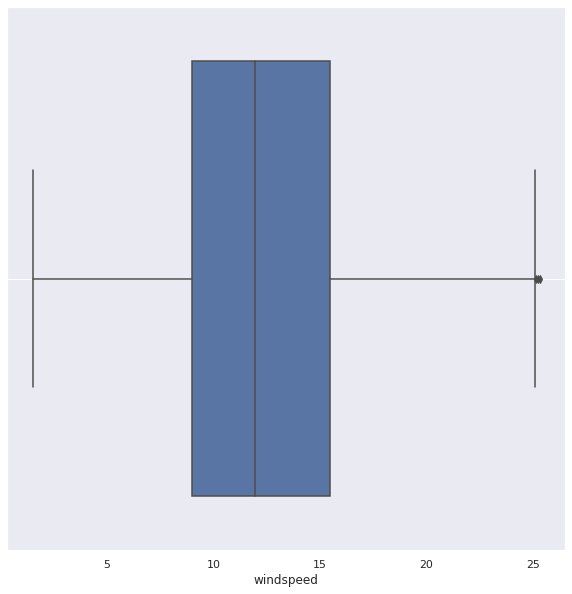

In [26]:
bike_dum=rem_outliers(bike_dum['windspeed'])
sns.boxplot(bike_dum['windspeed'])
plt.grid()


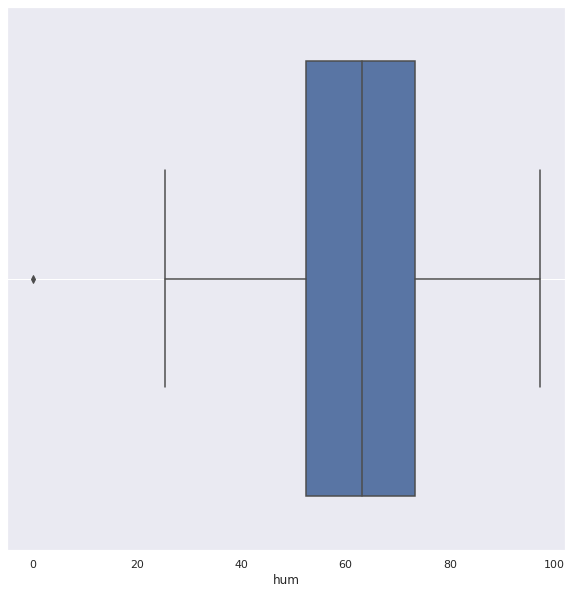

In [27]:
sns.boxplot(bike_dum['hum'])
plt.grid()

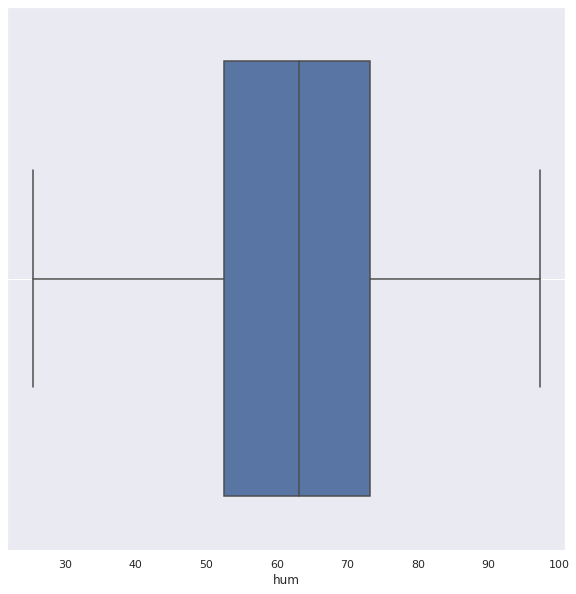

In [28]:
bike_dum=rem_outliers(bike_dum['hum'])
sns.boxplot(bike_dum['hum'])
plt.grid()


In [29]:
bike_dum.shape

(716, 30)

#Step 3: Before model building

1. Splitting the Data into Training and Testing Sets
2. Rescaling the Features


In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_dum, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
541,1,0,1,25.864153,29.73520,37.3333,23.292014,7442,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
116,0,0,1,25.420000,28.75710,83.5417,20.917400,3872,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
718,1,0,1,13.530000,16.76085,66.7917,8.875021,4128,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
496,1,0,0,23.130847,27.24085,48.0417,8.249911,7429,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
583,1,0,1,30.169153,34.88105,70.3750,7.832836,7273,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
493,1,0,1,23.575000,27.65125,74.4167,14.499604,4717,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
294,0,0,0,17.322500,21.27460,62.9167,6.208669,4308,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
157,0,0,1,29.007500,32.79750,59.7917,12.583136,4833,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
670,1,0,1,14.555000,17.80210,52.2083,17.833725,5847,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


*We will use MinMax scaling.*


In [33]:
# Instantiate object
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# list of continuous variables
cont_cols = ['temp','atemp','hum','windspeed']



In [34]:
df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
728,1,0,0,0.252441,0.204242,0.293114,0.923102,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
541,1,0,1,0.733702,0.689995,0.126342,0.914353,7442,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.719799,0.663818,0.826912,0.814718,3872,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
718,1,0,1,0.347624,0.342763,0.572964,0.309436,4128,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
496,1,0,0,0.648145,0.623239,0.288693,0.283207,7429,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
df_test[cont_cols] = scaler.fit_transform(df_test[cont_cols])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
583,1,0,1,0.835542,0.806922,0.625870,0.244339,7273,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
493,1,0,1,0.625343,0.612063,0.682135,0.570231,4717,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
294,0,0,0,0.426035,0.440199,0.522042,0.164945,4308,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
157,0,0,1,0.798513,0.750766,0.478539,0.476548,4833,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
670,1,0,1,0.337816,0.346608,0.372969,0.733212,5847,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [36]:
# Compute the correlation matrix
bcor = df_train.corr()
bcor

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
yr,1.000000,-0.024518,0.011094,0.098996,0.095203,-0.133907,-0.059272,0.593661,-0.000968,0.056747,-0.028883,-0.010697,-0.024437,0.012220,-0.010117,0.020757,0.025113,0.039218,0.025113,-0.025250,-0.024079,-0.010117,0.017446,-0.021675,0.001668,0.019008,-0.015469,0.024562,-0.011717,-0.079893
holiday,-0.024518,1.000000,-0.266381,-0.045288,-0.051408,-0.051216,0.029370,-0.105139,-0.049446,-0.008764,0.001895,0.043298,-0.055653,-0.009157,-0.017355,-0.049777,0.023856,-0.056358,0.023856,-0.052772,0.101753,-0.017355,0.261713,-0.070130,-0.041255,-0.007712,-0.009689,-0.073805,-0.043481,-0.028453
workingday,0.011094,-0.266381,1.000000,0.047272,0.045537,-0.003832,-0.047664,0.052080,0.034078,0.011202,-0.019570,0.042754,0.009901,0.017167,-0.010777,0.035459,-0.015695,0.029758,-0.030846,0.006038,-0.025775,0.004221,0.168452,0.263269,0.264768,0.250049,0.254885,-0.595949,0.045224,0.022672
temp,0.098996,-0.045288,0.047272,1.000000,0.989704,0.141499,-0.150023,0.656306,0.127878,0.692373,-0.225312,-0.272693,-0.187125,-0.059970,0.184205,0.288798,0.429167,0.359704,0.216184,-0.003156,-0.206006,-0.291115,-0.025781,0.015686,0.045701,0.036166,-0.029260,-0.044110,-0.078806,-0.046348
atemp,0.095203,-0.051408,0.045537,0.989704,1.000000,0.158096,-0.180256,0.657476,0.137034,0.666320,-0.203231,-0.271295,-0.185174,-0.050626,0.190571,0.281914,0.423252,0.330649,0.214462,0.010439,-0.194466,-0.283049,-0.019505,0.017713,0.043536,0.037395,-0.042189,-0.043575,-0.073353,-0.051633
hum,-0.133907,-0.051216,-0.003832,0.141499,0.158096,1.000000,-0.209754,-0.107514,-0.011164,0.031378,0.135071,-0.114862,-0.041782,-0.070841,0.128483,-0.123679,-0.054598,0.010891,0.171445,0.134592,-0.014600,0.069693,0.053400,0.003526,0.005026,-0.040899,-0.054470,0.024338,0.487256,0.298491
windspeed,-0.059272,0.029370,-0.047664,-0.150023,-0.180256,-0.209754,1.000000,-0.250475,0.111893,-0.118248,-0.125665,0.058779,0.101604,0.177805,-0.040909,0.031849,-0.094226,-0.073828,-0.075256,-0.079029,0.003969,-0.068107,-0.016467,0.042270,-0.033679,-0.016654,-0.021873,0.027289,-0.029398,0.146660
cnt,0.593661,-0.105139,0.052080,0.656306,0.657476,-0.107514,-0.250475,1.000000,0.114903,0.390272,0.042705,-0.239018,-0.135989,-0.011216,0.133983,0.172871,0.191546,0.203693,0.224842,0.091700,-0.064559,-0.164714,-0.055427,-0.002075,0.037613,0.027792,0.011407,0.046116,-0.170004,-0.212492
season_2,-0.000968,-0.049446,0.034078,0.127878,0.137034,-0.011164,0.111893,0.114903,1.000000,-0.344448,-0.321890,-0.149842,0.110129,0.507692,0.556702,0.229542,-0.175093,-0.175093,-0.175093,-0.163950,-0.177266,-0.177266,0.008640,-0.037453,-0.015347,0.041616,0.021414,-0.028719,0.036827,-0.027396
season_3,0.056747,-0.008764,0.011202,0.692373,0.666320,0.031378,-0.118248,0.390272,-0.344448,1.000000,-0.348201,-0.162090,-0.187036,-0.174874,-0.191755,0.079216,0.508329,0.508329,0.349753,-0.177351,-0.191755,-0.191755,-0.045538,0.058175,0.047958,-0.025918,-0.019767,-0.016389,-0.099522,-0.007558


Text(0.5, 1.0, 'Correlation between numerical features')

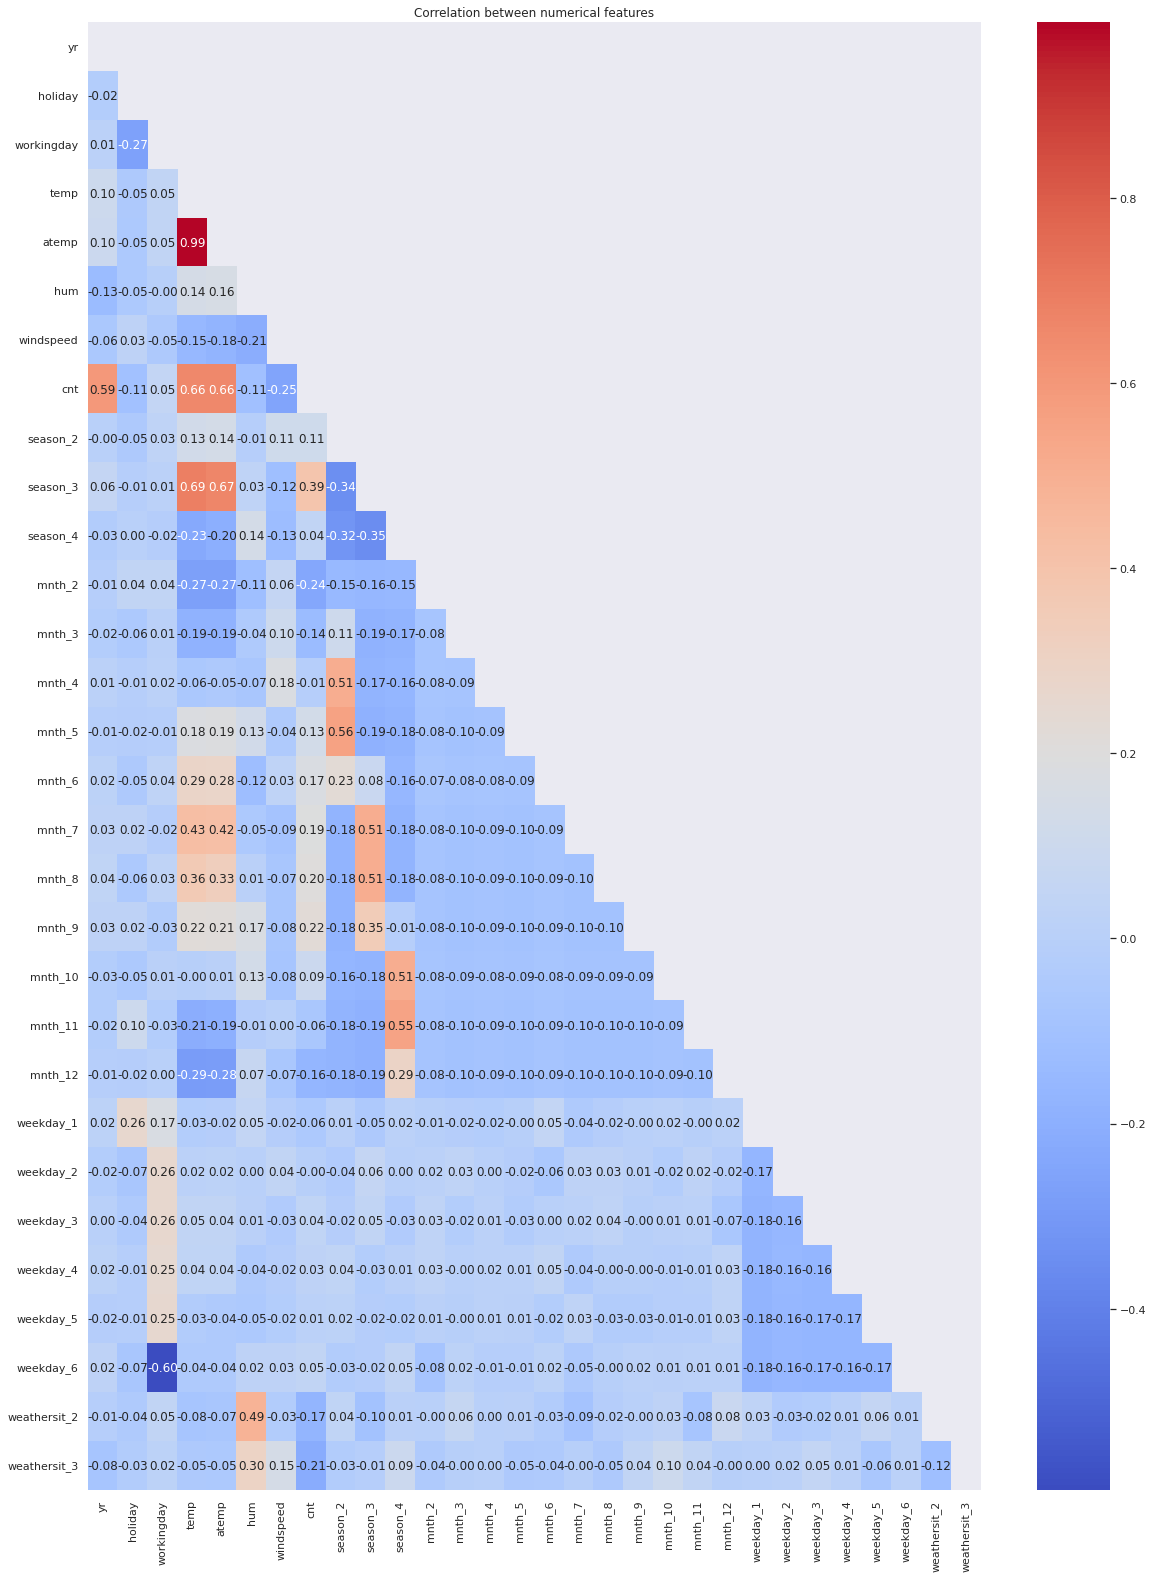

In [37]:
sns.set(rc={'figure.figsize':(20,27)})

# Generate a mask for the upper triangle
mk = np.zeros_like(bcor, dtype=np.bool)
mk[np.triu_indices_from(mk)] = True

sns.heatmap(bcor, mask=mk, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

In [38]:
sns.set(rc={'figure.figsize':(10,15)})


#Step 4: Model Building

*Dividing into X and Y sets for the model building*

In [39]:
dep_train = df_train.pop('cnt')
indep_train = df_train

In [40]:
dep_train.head()

728    1796
541    7442
116    3872
718    4128
496    7429
Name: cnt, dtype: int64

In [41]:
indep_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
728,1,0,0,0.252441,0.204242,0.293114,0.923102,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
541,1,0,1,0.733702,0.689995,0.126342,0.914353,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.719799,0.663818,0.826912,0.814718,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
718,1,0,1,0.347624,0.342763,0.572964,0.309436,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
496,1,0,0,0.648145,0.623239,0.288693,0.283207,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**We first build a model using all variables and then try to improve the model by dropping insignificant variables**

In [42]:
# build model for all var
indep_train_sm = sm.add_constant(indep_train)

#create model using statsmodels
mlr=sm.OLS(dep_train,indep_train_sm)

#fit the model
mlr_model=mlr.fit()

#params
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     104.9
Date:                Sun, 08 May 2022   Prob (F-statistic):          5.63e-183
Time:                        05:11:29   Log-Likelihood:                -4014.8
No. Observations:                 501   AIC:                             8088.
Df Residuals:                     472   BIC:                             8210.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1212.0475    212.028      5.716      0.000     795.412    1628.683
yr            1995.4003     69.804     28.586      0.000    1858.236    2132.565
holiday       -283.2191    182.892     -1.549      0.122    -642.603      76.164
workingday     294.6596     78.713      3.743      0.000     139.988     449.331
temp          2743.3336   1174.409      2.336      0.020     435.617    5051.051
atemp         1143.3701   1164.281      0.982      0.327   -1144.444    3431.185
hum          -1148.0489    241.590     -4.752      0.000   -1622.773    -673.325
windspeed    -1017.1108    185.333     -5.488      0.000   -1381.291    -652.931
season_2       707.9572    209.007      3.387      0.001     297.258    1118.657
season_3       633.7981    255.023      2.485      0.013     132.678    1134.918
season_4      1586.2974    210.567      7.533      0.000    1172.533    2000.062
mnth_2         306.1457    176.524      1.734      0.084     -40.724     653.015
mnth_3         696.8505    194.855      3.576      0.000     313.961    1079.740
mnth_4         591.3229    287.861      2.054      0.041      25.675    1156.970
mnth_5         847.9905    317.051      2.675      0.008     224.985    1470.996
mnth_6         552.0762    339.465      1.626      0.105    -114.973    1219.126
mnth_7         296.8203    374.622      0.792      0.429    -439.312    1032.953
mnth_8         573.9516    362.948      1.581      0.114    -139.242    1287.146
mnth_9        1176.0560    317.993      3.698      0.000     551.199    1800.913
mnth_10        440.8855    286.091      1.541      0.124    -121.285    1003.056
mnth_11       -160.2505    266.907     -0.600      0.549    -684.724     364.223
mnth_12         25.2580    210.755      0.120      0.905    -388.877     439.393
weekday_1     -144.3581     81.730     -1.766      0.078    -304.958      16.242
weekday_2      -12.8821     95.678     -0.135      0.893    -200.889     175.125
weekday_3       99.5616     91.595      1.087      0.278     -80.422     279.545
weekday_4      -82.0662     90.997     -0.902      0.368    -260.875      96.742
weekday_5      151.1852     90.727      1.666      0.096     -27.094     329.464
weekday_6      523.6010    127.545      4.105      0.000     272.974     774.228
weathersit_2  -378.6353     90.979     -4.162      0.000    -557.410    -199.861
weathersit_3 -1743.1731    262.507     -6.640      0.000   -2259.001   -1227.346
==============================================================================
Omnibus:                       65.139   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.199
Skew:                          -0.692   Prob(JB):                     2.42e-33
Kurtosis:                       5.297   Cond. No.                     5.13e+15
===============

**Function to calculate VIF**

In [43]:
def calc_vif(indep):
  mvif = pd.DataFrame()
  mvif['Features'] = indep.columns
  mvif['VIF'] = [variance_inflation_factor(indep.values, i) for i in range(indep.shape[1])]
  mvif['VIF'] = round(mvif['VIF'], 2)
  mvif = mvif.sort_values(by = "VIF", ascending = False)
  return mvif

*Checking VIF for complete train data*

In [44]:
calc_vif(indep_train)

,Features,VIF
24,weekday_4,inf
22,weekday_2,inf
2,workingday,inf
1,holiday,inf
23,weekday_3,inf
25,weekday_5,inf
21,weekday_1,inf
3,temp,443.78
4,atemp,382.37
8,season_3,15.55


*Since we can see there are too many features with VIF infinity and VIF greater than 5 we need some automated way to select best features*

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

**Variable Selection using RFE  : Recursive feature elimination**

*Running RFE with the number of the features equal to 15*


In [45]:
bike_mlr = LinearRegression()
bike_mlr.fit(indep_train, dep_train)

rfe = RFE(bike_mlr,n_features_to_select=15)

rfe = rfe.fit(indep_train, dep_train)
list(zip(indep_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 7),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 15),
 ('weekday_1', False, 12),
 ('weekday_2', False, 14),
 ('weekday_3', False, 11),
 ('weekday_4', False, 13),
 ('weekday_5', False, 9),
 ('weekday_6', False, 5),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

*Top 15 columns that you must consider in multiple linear regression*

In [46]:
sup_cols = indep_train.columns[rfe.support_]
sup_cols

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_5', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
indep_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

**Building model using statsmodel, for the detailed statistics**


*Creating X_train dataframe with RFE selected variables*


In [48]:
indep_train_rfe = indep_train[sup_cols]
indep_train_rfe

,yr,holiday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_5,mnth_9,mnth_10,weathersit_2,weathersit_3
728,1,0,0.252441,0.204242,0.293114,0.923102,0,0,0,0,0,0,0,0,0
541,1,0,0.733702,0.689995,0.126342,0.914353,0,1,0,0,0,0,0,0,0
116,0,0,0.719799,0.663818,0.826912,0.814718,1,0,0,0,0,0,0,1,0
718,1,0,0.347624,0.342763,0.572964,0.309436,0,0,1,0,0,0,0,1,0
496,1,0,0.648145,0.623239,0.288693,0.283207,1,0,0,0,1,0,0,0,0
505,1,0,0.691993,0.651139,0.790272,0.592642,1,0,0,0,1,0,0,1,0
721,1,0,0.239607,0.241404,0.341757,0.311179,0,0,0,0,0,0,0,0,0
452,1,0,0.558310,0.539587,0.226153,0.835661,1,0,0,1,0,0,0,0,0
465,1,0,0.371618,0.345516,0.272240,0.767135,1,0,0,0,0,0,0,0,0
468,1,0,0.559379,0.547204,0.322805,0.473763,1,0,0,0,0,0,0,0,0


In [49]:
# Adding a constant variable 
indep_train_rfe = sm.add_constant(indep_train_rfe)

In [50]:
# Running the linear model
bike_mlr = sm.OLS(dep_train,indep_train_rfe).fit()

In [51]:
#Let's see the summary of our linear model
print(bike_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     184.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.07e-189
Time:                        05:11:29   Log-Likelihood:                -4033.5
No. Observations:                 501   AIC:                             8099.
Df Residuals:                     485   BIC:                             8166.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1599.4980    184.295      8.679   

* atemp and mnth_5 have p-value greater than 0.05 
* Thus these are insignificant in presence of other variables and can be dropped

In [52]:
indep_train_new = indep_train_rfe.drop(['atemp','mnth_5'], axis = 1)

*Dropping const so that it doesnot effect VIF*

In [53]:
indep_train_new = indep_train_new.drop(['const'], axis = 1)


*Calculate the VIFs after dropping insignificant variables based on p-values*

In [54]:
calc_vif(indep_train_new)

,Features,VIF
2,temp,21.51
3,hum,10.22
6,season_3,7.39
4,windspeed,4.01
5,season_2,3.53
7,season_4,2.89
11,weathersit_2,2.46
0,yr,1.99
10,mnth_10,1.57
9,mnth_9,1.32


**We will drop column season_3**

 * Correlation of variable temp with target variable cnt is 0.66
 * Correlation of variable season_3 with target variable cnt is 0.39
 * Correlation of variable season_3 with variable temp is 0.69

**From above info we can infer that**

  * variable temp is very significant variable for regression model in comparison to season_3
  * the high VIF for temp is because of high correlation between temp and season_3

**We will drop column hum**

 * Correlation of variable hum with target variable cnt is -0.11
 * But its VIF is 10.22 which is quite big

In [55]:
indep_train_new = indep_train_new.drop(['season_3','hum'], axis = 1)

*Calculate VIF after dropping variable season_3 and hum*

In [56]:
calc_vif(indep_train_new)

,Features,VIF
2,temp,4.19
3,windspeed,3.83
0,yr,1.96
5,season_4,1.82
4,season_2,1.56
9,weathersit_2,1.54
8,mnth_10,1.52
7,mnth_9,1.24
6,mnth_3,1.16
10,weathersit_3,1.09


**We can see all variables now have VIF < 5**

*Retraining model after dropping insignificant variables and removing multicollinearity*

In [57]:
indep_train_mlr = sm.add_constant(indep_train_new)
bike_mlr = sm.OLS(dep_train,indep_train_mlr).fit() 
#Let's see the summary of our linear model
print(bike_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.18e-184
Time:                        05:11:30   Log-Likelihood:                -4056.2
No. Observations:                 501   AIC:                             8136.
Df Residuals:                     489   BIC:                             8187.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          960.6454    157.110      6.114   

**We can see mnth_10 has p-value greater than 0.05**

* we will drop mnth_10 column and retrain model as it is insignificant variable

In [58]:
indep_train_new = indep_train_new.drop(['mnth_10'], axis = 1)

*Checking if VIF is still less than 5 for all features being considered*

In [59]:
calc_vif(indep_train_new)

,Features,VIF
2,temp,4.10
3,windspeed,3.81
0,yr,1.96
4,season_2,1.56
8,weathersit_2,1.53
5,season_4,1.37
7,mnth_9,1.21
6,mnth_3,1.16
9,weathersit_3,1.09
1,holiday,1.04


In [60]:
indep_train_mlr = sm.add_constant(indep_train_new)
bike_mlr = sm.OLS(dep_train,indep_train_mlr).fit() 
#Let's see the summary of our linear model
print(bike_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     248.9
Date:                Sun, 08 May 2022   Prob (F-statistic):          6.59e-185
Time:                        05:11:30   Log-Likelihood:                -4057.8
No. Observations:                 501   AIC:                             8138.
Df Residuals:                     490   BIC:                             8184.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          935.5149    156.833      5.965   

In [61]:
indep_train_mlr.head()

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_3,mnth_9,weathersit_2,weathersit_3
728,1.0,1,0,0.252441,0.923102,0,0,0,0,0,0
541,1.0,1,0,0.733702,0.914353,0,0,0,0,0,0
116,1.0,0,0,0.719799,0.814718,1,0,0,0,1,0
718,1.0,1,0,0.347624,0.309436,0,1,0,0,1,0
496,1.0,1,0,0.648145,0.283207,1,0,0,0,0,0


In [62]:
indep_train_new.shape

(501, 10)

**This means we have 10 features in our multiple regression best fit line**

In [63]:
indep_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_3',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#Step 5: Residual Analysis of the train data


Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
dep_train_cnt = bike_mlr.predict(indep_train_mlr)


Text(0.5, 0, 'Errors')

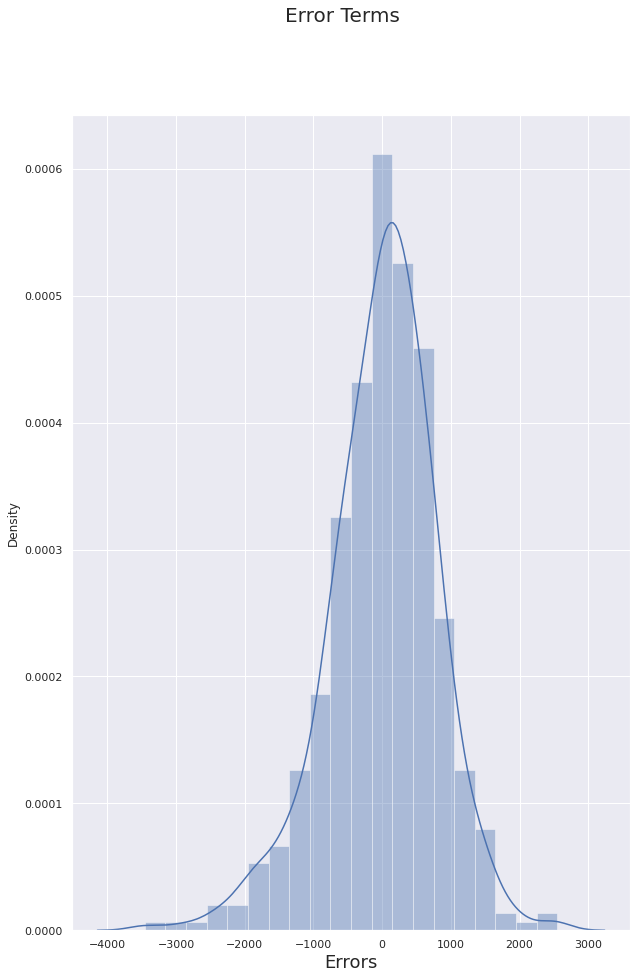

In [65]:
fig = plt.figure()
sns.distplot((dep_train - dep_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

#Step 6: Model Evaluation:


*Splitting test dataset*

In [66]:
dep_test = df_test.pop('cnt')
indep_test = df_test

*Our test dataset should have only the 11 columns that have been considered significant using training data*

In [67]:
indep_test_new = indep_test[indep_train_new.columns]
indep_test_new.shape

(215, 10)

*Adding a constant variable to test dataset*

In [68]:
indep_test_new = sm.add_constant(indep_test_new)

**Using model trained on train dataset and making predictions on test dataset**

In [69]:
dep_pred = bike_mlr.predict(indep_test_new)

Text(0, 0.5, 'y_pred')

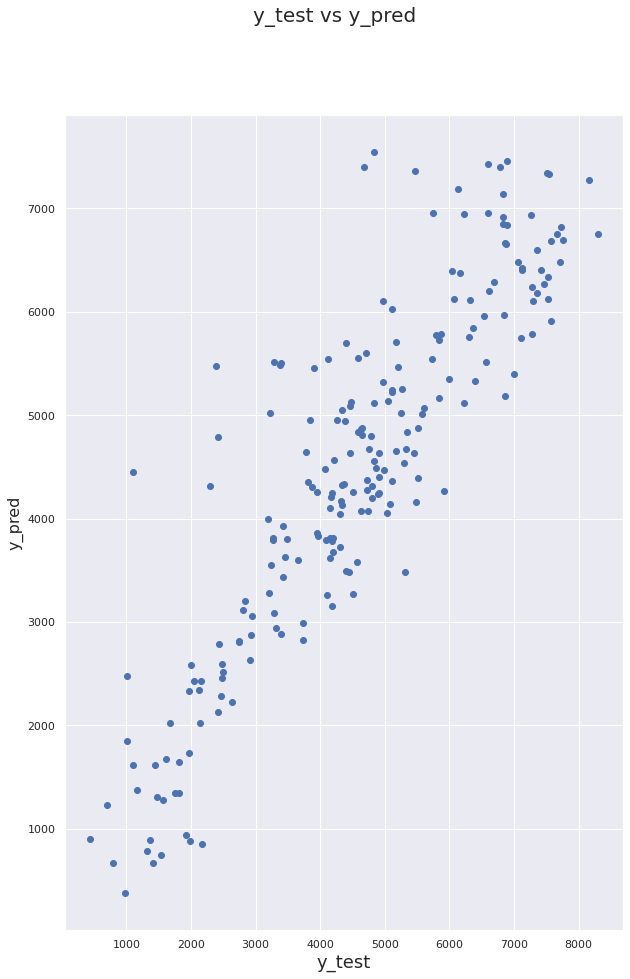

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(dep_test,dep_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                  

Building regression plot from seaborn library which plot a line graph on top of scatter plot
A straight line denotes how well the model is working

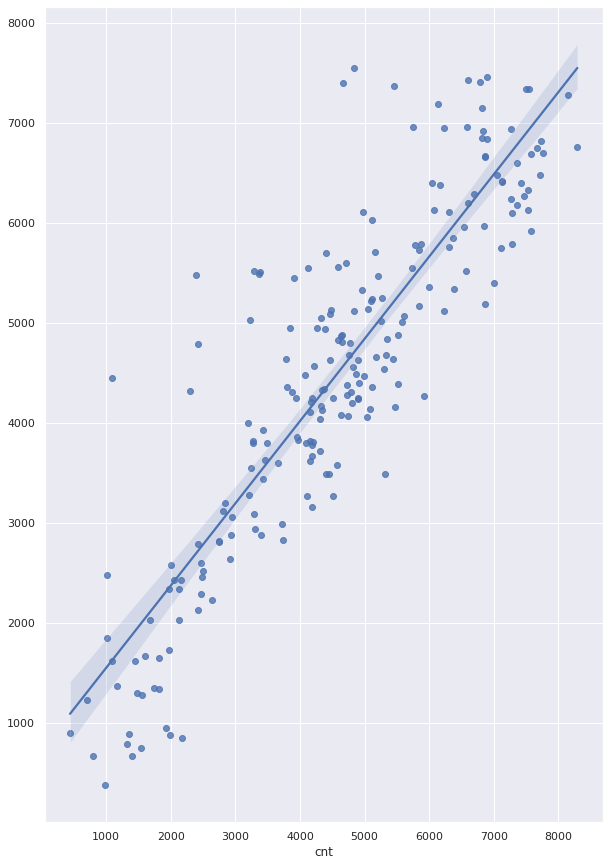

In [71]:
sns.regplot(dep_test,dep_pred)             

**Calculate the R-squared score on the test set.**

In [72]:
r2_score(dep_test, dep_pred)

0.7732798286730701

**Calculate the R-squared score on the train set.**

In [74]:
r2_score(dep_train, dep_train_cnt)

0.8355383324093387

In [76]:
test_bike_mlr = sm.OLS(dep_test,indep_test_new).fit() 


**Calculate the Adjusted R-squared score on the test set.**

In [77]:
print(test_bike_mlr.rsquared_adj)


0.7871787813670943


#Reporting the final model

**We can see that the equation of our best fitted line is:**

###cnt = 935.5149 + (yr * 2035.7847) + (holiday * -768.6513) + (temp * 4906.6165) + (windspeed * -835.1827) + (season_2 * 666.7628) + (season_4 * 1153.7953) + (mnth_3 * 287.8592) + (mnth_9 * 831.5268) + (weathersit_2 * -630.2474) + (weathersit_3 * -2259.6139)

where

* cnt: count of total rental bikes
* yr : year (0: 2018, 1:2019)
* holiday : weather day is a holiday or not
* temp : temperature in Celsius
* windspeed : wind speed
* season_2 : summer
* season_4 : winter
* mnth_3 : March
* mnth_9 : September
* weathersit_2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#END